In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import desc, distinct, func

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate lastest record date in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
    
# Select the date and prcp "columns", filter the last twelve months of data and order by date
last_twelve_mo = engine.execute("SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23' AND prcp NOT NULL ORDER BY date ASC")
# for record in last_twelve_mo:
#     print(record)

# Save the query results as a Pandas DataFrame 
twelve_mo_df= pd.DataFrame(last_twelve_mo, columns= ['date','prcp'])
# twelve_mo_df

# set the index to the date column
twelve_mo_df.set_index('date', inplace=True)
twelve_mo_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


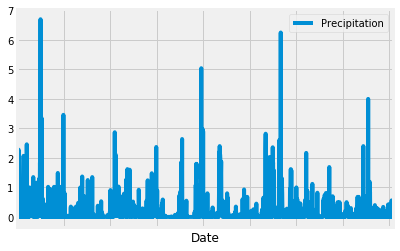

In [11]:
twelve_mo_df.plot()

# Add labels, legend & grid lines
plt.grid(True)
plt.xlabel("Date")
plt.legend(["Precipitation"])
plt.tick_params(labelbottom=False)

# Save the Figure
plt.savefig('twelve_mo_prcp.png')
plt.show()

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = pd.DataFrame(twelve_mo_df['prcp'].describe())
summary = summary.rename(columns = {'prcp':'Precipitation'})
summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [14]:
# List the stations and the count of records in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?    

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station =='USC00519281').\
    order_by(Measurement.tobs.asc()).scalar()

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station =='USC00519281').\
    order_by(Measurement.tobs.asc()).scalar()

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station =='USC00519281').scalar()

print(f"[({lowest_temp}, {highest_temp}, {avg_temp})]")

[(54.0, 85.0, 71.66378066378067)]


In [16]:
# Query the last 12 months of temperature observation data for station with the highest number of observations

# Tobs query: filter station with the highest number of observations, filter the last twelve months of data 
station_tobs = session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
# for temps in station_tobs:
#     print(temps)

# Create a DataFrame of Tobs    
station_tobs_df = pd.DataFrame(station_tobs, columns= ['tobs'])
# tobs_df


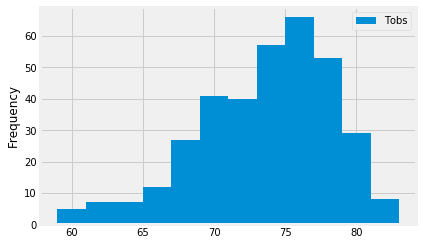

In [17]:
# Plot the results as a histogram with bins=12
station_tobs_df.plot.hist(bins=12)

# Format Histogram
plt.grid(True)
plt.ylabel("Frequency")
plt.legend(["Tobs"])

plt.savefig('tobs_histogram.png')
plt.show()